Connected to scarches (Python 3.9.21)

In [ ]:
import os

In [ ]:
import scanpy as sc
import pandas as pd
import numpy as np
import scarches as sca
from scarches.dataset.trvae.data_handling import remove_sparsity
from scipy import sparse
from anndata import AnnData
from typing import Optional, Union

## Initialize folders

/usr/local/conda/envs/scarches/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
 captum (see https://github.com/pytorch/captum).


In [ ]:
import configparser

# Read configuration file
config = configparser.ConfigParser()
config.read("../../utils/config.ini")

rawPath = config.get("DEFAULT", "rawPath")
scriptsPath = config.get("DEFAULT", "scriptsPath")
figPath = config.get("DEFAULT", "figPath")

initDir = rawPath + 'metacells_step0/endothelial/'
outDir = rawPath + 'integration/metacells/endothelial_testing_ovca/'
ooseDir = rawPath + 'out_of_sample_extension/endothelial_testing_ovca/'
genes = scriptsPath + '4_hdg/Tables/atlas_hdg_dispersion_patients_endothelial.csv'

In [ ]:
if not os.path.exists(outDir):
    os.makedirs(outDir)
## Setting fig parameteres
sc.settings.set_figure_params(dpi_save=300, frameon=False, format='png')
sc.settings.figdir = figPath + "oose/endothelial_testing/"

## Loading reference data and creating integration model

In [ ]:
ad = sc.read_h5ad("/group/testa/Project/OvarianAtlas/atlas_project/cellxgene/OvCA_umap_tiled.h5ad")
ad.obs['tissue-treatment'] = ad.obs['tissue'].astype('str') + '_' + ad.obs['treatment'].astype('str')
ad.obs['cell_type'] = ad.obs.loc[:, 'tissue-treatment']
major_cell_type = "EndothelialMSK"
ad = ad[ad.obs["01_major_celltypes"] == major_cell_type]

KeyError: 'tissue'

In [ ]:
ad = sc.read_h5ad("/group/testa/Project/OvarianAtlas/atlas_project/cellxgene/OvCA_umap_tiled.h5ad")
ad.obs['tissue-treatment'] = ad.obs['02_tissue'].astype('str') + '_' + ad.obs['03_treatment'].astype('str')
ad.obs['cell_type'] = ad.obs.loc[:, 'tissue-treatment']
major_cell_type = "EndothelialMSK"
ad = ad[ad.obs["01_major_celltypes"] == major_cell_type]

In [ ]:
ad.X



ArrayView([[ 1.96e-01,  1.01e+00,  4.86e+00,  3.22e+00,  2.73e+00,
             2.51e-01, -5.23e-02, ...,  8.42e-01,  4.30e+00,  7.73e-01,
             5.16e-01,  5.56e-01,  6.80e-01,  1.15e+00],
           [ 4.96e-01,  2.40e+00,  4.46e+00,  1.47e+00,  2.79e+00,
             4.47e-01, -4.88e-02, ...,  4.58e-01,  4.15e+00,  2.43e+00,
             2.40e+00,  2.65e+00,  9.19e-01,  8.28e-01],
           [ 4.59e-01,  2.15e+00,  4.47e+00,  1.10e+00,  2.31e+00,
             4.78e-01, -4.41e-02, ...,  3.31e-01,  4.32e+00,  2.07e+00,
             2.07e+00,  2.19e+00,  6.70e-01,  9.40e-01],
           [ 1.37e-01,  1.21e+00,  4.60e+00,  2.29e+00,  2.33e+00,
             2.27e-01, -2.74e-02, ...,  3.27e-01,  4.33e+00,  5.44e-01,
             5.49e-01,  4.40e-01,  3.81e-01,  1.32e+00],
           [ 3.92e-01,  2.03e+00,  4.24e+00,  1.47e+00,  2.37e+00,
             3.78e-01, -4.31e-02, ...,  3.39e-01,  4.09e+00,  1.72e+00,
             1.67e+00,  1.79e+00,  5.48e-01,  9.60e-01],
           [ 1.93e-0

In [ ]:
sc.pp.log1p(ad)
hdg = pd.read_csv(genes, index_col=0)
ad.var['highly_variable'] = hdg.highly_variable
ad.var.highly_variable = ad.var.highly_variable.fillna(False)
ad.raw = ad
ad = ad[:, ad.var.highly_variable]
sc.tl.pca(ad, use_highly_variable=True)
sc.pp.neighbors(ad, use_rep='X_pca')
sc.tl.umap(ad)

/usr/local/conda/envs/scarches/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:406: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/local/conda/envs/scarches/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:385: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)
/usr/local/conda/envs/scarches/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:377: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
nan_values_row = np.sum(np.isnan(ad.X), axis=1)
ad = ad[~nan_values_row]

In [ ]:
sc.pp.log1p(ad)
hdg = pd.read_csv(genes, index_col=0)
ad.var['highly_variable'] = hdg.highly_variable
ad.var.highly_variable = ad.var.highly_variable.fillna(False)
ad.raw = ad
ad = ad[:, ad.var.highly_variable]
sc.tl.pca(ad, use_highly_variable=True)
sc.pp.neighbors(ad, use_rep='X_pca')
sc.tl.umap(ad)

/usr/local/conda/envs/scarches/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:406: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/local/conda/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/conda/envs/scarches/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:377: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)
/usr/local/conda/envs/scarches/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca
/usr/local/conda/en

In [ ]:
np.sum(np.sum(np.isnan(ad.X), axis=1))

0

In [ ]:
ad.X



array([[ 0.03, -0.13,  0.37, -0.11, -0.32, -0.01, -0.01, ..., -0.03,
         0.33, -0.14, -0.14, -0.21,  0.03, -0.06],
       [ 0.03, -0.13,  0.37, -0.11, -0.32, -0.01, -0.01, ..., -0.03,
         0.33, -0.14, -0.14, -0.21,  0.03, -0.06],
       [ 0.03, -0.13,  0.37, -0.11, -0.32, -0.01, -0.01, ..., -0.03,
         0.33, -0.14, -0.14, -0.21,  0.03, -0.06],
       [ 0.03, -0.13,  0.37, -0.11, -0.32, -0.01, -0.01, ..., -0.03,
         0.33, -0.14, -0.14, -0.21,  0.03, -0.06],
       [ 0.03, -0.13,  0.37, -0.11, -0.32, -0.01, -0.01, ..., -0.03,
         0.33, -0.14, -0.14, -0.21,  0.03, -0.06],
       [ 0.03, -0.13,  0.37, -0.11, -0.32, -0.01, -0.01, ..., -0.03,
         0.33, -0.14, -0.14, -0.21,  0.03, -0.06],
       [ 0.03, -0.13,  0.37, -0.11, -0.32, -0.01, -0.01, ..., -0.03,
         0.33, -0.14, -0.14, -0.21,  0.03, -0.06],
       ...,
       [ 0.03, -0.13,  0.37, -0.11, -0.32, -0.01, -0.01, ..., -0.03,
         0.33, -0.14, -0.14, -0.21,  0.03, -0.06],
       [ 0.03, -0.13,  0.37,

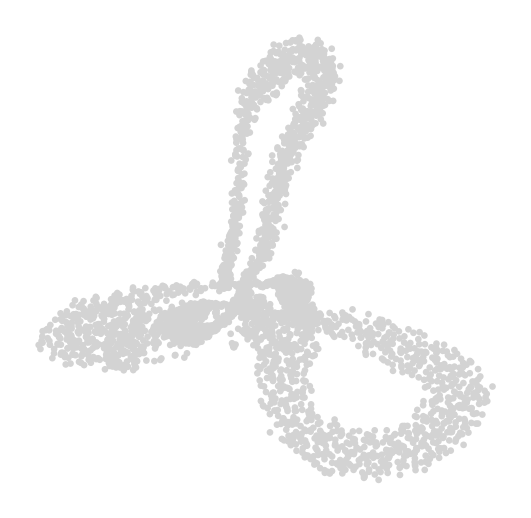

In [ ]:
sc.pl.umap(ad)

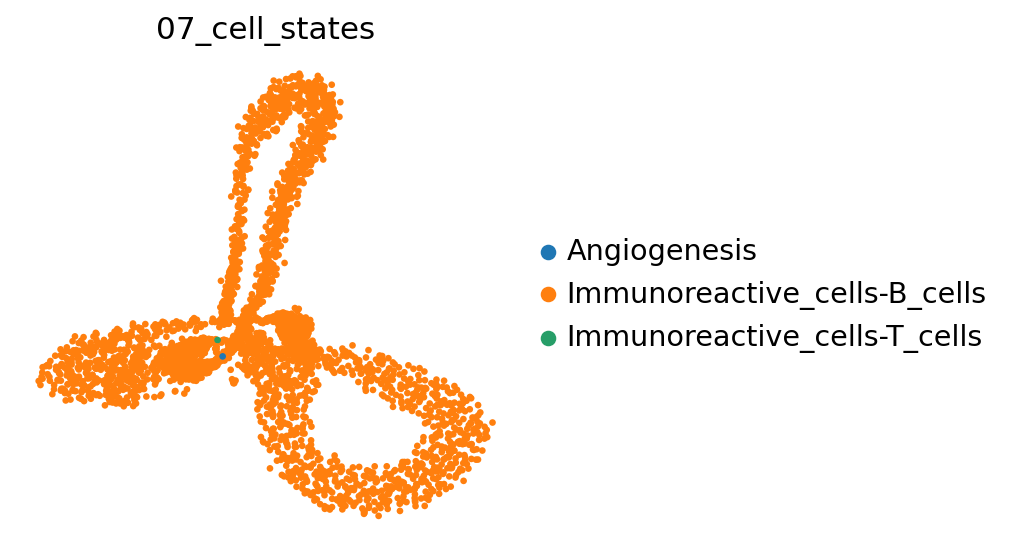

In [ ]:
sc.pl.umap(ad,color="07_cell_states")

In [ ]:
ad

AnnData object with n_obs × n_vars = 3333 × 1542
    obs: '02_tissue', '12_developmental_stage', '03_treatment', '11_recurrence', '10_tumor_stage', '14_paper_ID', '09_anatomical_location', '13_dataset', '08_phase', '07_cell_states', '05_cell_types', '06_cell_subtypes', '01_major_celltypes', '04_functional_annotation', 'tissue-treatment', 'cell_type'
    var: 'highly_variable'
    uns: 'functional_annotation_colors', 'major_celltypes_colors', 'tissue_colors', 'log1p', 'pca', 'neighbors', 'umap', '07_cell_states_colors'
    obsm: 'X_umap_shifted', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

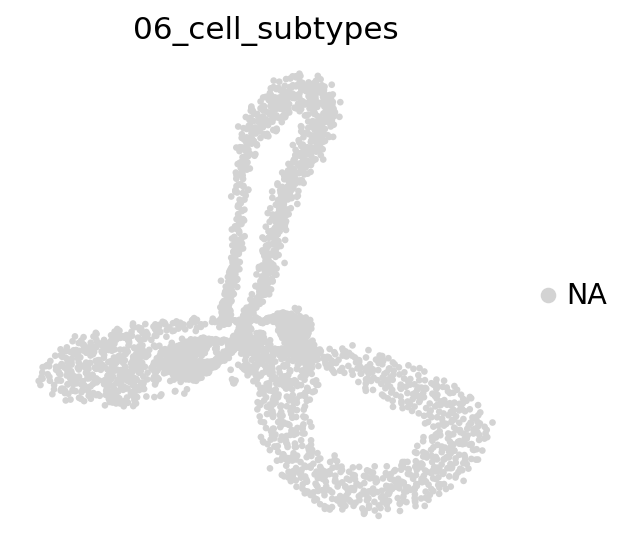

In [ ]:
sc.pl.umap(ad,color="06_cell_subtypes")